In [1]:
import numpy as np #for linear algebra
import matplotlib.pyplot as plt #for plotting
import os 
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, image

In [2]:
path= r'F:\College\semster 4\Data Science Tools and Software\project\archive\chest_xray'
mainDIR = os.listdir(path)
print(mainDIR)

['chest_xray', 'test', 'train', 'val', '__MACOSX']


In [3]:
train_folder= r'F:\College\semster 4\Data Science Tools and Software\project\archive\chest_xray\train'
val_folder = r'F:\College\semster 4\Data Science Tools and Software\project\archive\chest_xray\val'
test_folder = r'F:\College\semster 4\Data Science Tools and Software\project\archive\chest_xray\test'

In [4]:
train= os.listdir(train_folder)
train_n = train_folder+r'\NORMAL'
train_p = train_folder+r'\PNEUMONIA'
print(train_n)

F:\College\semster 4\Data Science Tools and Software\project\archive\chest_xray\train\NORMAL


1341
normal picture title:  NORMAL2-IM-0511-0001.jpeg
pneumonia picture title: person1340_virus_2312.jpeg


Text(0.5, 1.0, 'Pneumonia')

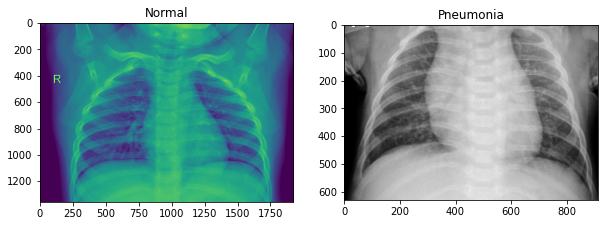

In [5]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+ r'/' +norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+ r'/' +sic_pic
print('pneumonia picture title:', sic_pic)

#loading the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#plotting these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [9]:
cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Dropout(rate=0.25))

# 2nd Convolution
cnn.add(Conv2D(64, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dropout(rate=0.5))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.


training_set = train_datagen.flow_from_directory(r'F:\College\semster 4\Data Science Tools and Software\project\archive\chest_xray\train',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary')
print(len(training_set))
print(training_set.class_indices)

validation_generator = test_datagen.flow_from_directory(r'F:\College\semster 4\Data Science Tools and Software\project\archive\chest_xray\val',
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(r'F:\College\semster 4\Data Science Tools and Software\project\archive\chest_xray\test',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 5216 images belonging to 2 classes.
326
{'NORMAL': 0, 'PNEUMONIA': 1}
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [13]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 21,
                         epochs = 10,
                         validation_data = validation_generator,
                         validation_steps = 21)

C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
21/21 [==============================] - 110s 3s/step - loss: 4.7000 - accuracy: 0.6633 - val_loss: 0.7828 - val_accuracy: 0.5000
Epoch 2/10
21/21 [==============================] - 70s 3s/step - loss: 0.6511 - accuracy: 0.6849
Epoch 3/10
21/21 [==============================] - 68s 3s/step - loss: 0.5693 - accuracy: 0.7659
Epoch 4/10
21/21 [==============================] - 91s 4s/step - loss: 0.5804 - accuracy: 0.7065
Epoch 5/10
21/21 [==============================] - 98s 5s/step - loss: 0.4988 - accuracy: 0.7807
Epoch 6/10
21/21 [==============================] - 90s 4s/step - loss: 0.4650 - accuracy: 0.7885
Epoch 7/10
21/21 [==============================] - 81s 4s/step - loss: 0.4758 - accuracy: 0.7381
Epoch 8/10
21/21 [==============================] - 77s 4s/step - loss: 0.3870 - accuracy: 0.7827
Epoch 9/10
21/21 [==============================] - 75s 3s/step - loss: 0.4371 - accuracy: 0.8154
Epoch 10/10
21/21 [==============================] - 74s 3s/step - loss: 0.

In [14]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [15]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 77.24359035491943 %


In [36]:
path=r'F:\College\semster 4\Data Science Tools and Software\project\archive\chest_xray\test\NORMAL\NORMAL2-IM-0058-0001.jpeg '
img= image.load_img(path,target_size=(256,256))
img= image.img_to_array(img)/255
img=np.array([img])
img.shape

(1, 256, 256, 3)

In [37]:
res = cnn.predict_classes(img)
print(res)

[[0]]
